# Code for Feed Forward Deep Neural Network

In [1]:
import numpy as np
import math


In [34]:
def Relu(x):
    value=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<0 :
            value[i]=0
        else :
            value[i]=x[i]
    return value
    
def der_relu(x):
    value=np.zeros(len(x))
    for i in range(len(x)):
        if x[i]<0 :
            value[i]=0
        else :
            value[i]=1
    return value
    
def sigmoid(x):
    return 1/(1+np.exp(-x))

def der_sigmoid(x):
    y=sigmoid(x)
    return y*(1-y)


In [36]:
class Deep_Neural_network:
    def __init__(self, nodes, hidden_activation=Relu, output_activation=sigmoid):
        self.nodes=nodes#list expected
        self.hact=hidden_activation
        self.oact= output_activation
        self.batch=batch_size
        self.layers =len(nodes)
        
        self.b = np.array([np.random.rand(self.nodes[i]) for i in range(self.layers-1)])
        self.W= np.array([np.random.rand(self.nodes[i+1], self.nodes[i]) for i in range(self.layers-1)])  
    
    def __forward_propagation(self, x):
        """ x is a vector of features of a data point"""
        
        self.z= np.array([np.zeros(self.nodes[i]) for i in range(self.layers)])  #layers-1 column
        self.a=np.array( [np.zeros(self.nodes[i]) for i in range(self.layers-1)])
                  
        #setting their values
        self.z[0] =x
        for l in range(self.layers-1):
            self.a[l]=np.dot(self.W[l], self.z[l])+self.b[l]
            self.z[l+1]=self.hact(a[l])
        self.z[self.layers-1] = self.oact(a[self.layers-2])
            
    def __back_propagation(self, x, y):
        self.delta = np.array([np.random.rand(self.nodes[i]) for i in range(self.layers-1)])
        self.delta[self.layers-2]= (self.z[self.layers-1]-y)*self.z[self.layers-1]*(np.ones(self.nodes[self.layers-1])
                                                                               -self.z[self.layers-1])
        for l in range(self.layers-2):
            self.delta[self.layers-3-l]=der_relu(self.a[self.layers-3-l])*np.dot(self.W[self.layers-2-l].T, self.delta[self.layers-2-l]) 
            
        self.db = self.delta
        self.dW= self.W.copy() 
        for l in range(self.layers-1):
            self.dW[l]=np.outer(self.delta[l], self.z[l])
            
    def train(self, X, Y, learning_rate = 0.01, batch_size=32, n_epoch=5):
        ## shuffle the data set
        dataset = list(zip(X, Y))
        dataset_copy=dataset.copy()
        np.random.shuffle(dataset_copy)
        #X_sh=np.array(np.array([i[0]) for i in dataset_copy])
        #Y_sh =np.array(np.array([i[1]) for i in dataset_copy])
        
        #forward-backward propagation
        for i in range(epoch):
            for x,y in dataset_copy:
                self.__forward_propagation(x)
                self.__back_propagation(x, y)
                
                self.W =self.W-learning_rate*self.dW
                self.b = self.b -learning_rate*self.db    
        return self
    
    def predict(self, X_test):
        Y_predict=[]
        for x in X_test:
            self.__forward_propagation(x)
            y_pr=self.z[self.layers-1]
            Y_predict.append(y_pr)
        return Y_predict
    

# Example Digit Classification using MNIST Data

In [24]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)
# Define the features and the labels
X, Y = mnist['data'], np.asfarray(mnist['target'])

3.0

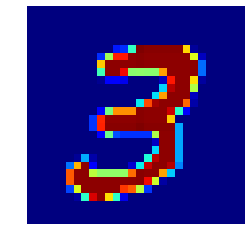

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
some_index = 7
some_digit = X[some_index]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=cm.jet, interpolation='nearest')
plt.axis('off')
# Check the label
Y[some_index]